# Read the data
We load the csv files. These are all located in the ```data``` folder in the root of this project. <br>
We read the data in order to process and visualize it later. 

In [2]:
#Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-darkgrid')

ModuleNotFoundError: No module named 'pandas'

In [3]:
#Reading the data from CSV
df = pd.read_csv('../data/usd.csv')

NameError: name 'pd' is not defined

#Editing dataframe
We are sorting the data, formating the date and resetting the index.

In [3]:
#df.sort_values('Date', ascending=False)
df['Date']

0       04/30/21
1       04/29/21
2       04/28/21
3       04/27/21
4       04/26/21
          ...   
9001    01/24/86
9002    01/23/86
9003    01/22/86
9004    01/21/86
9005    01/20/86
Name: Date, Length: 9006, dtype: object

In [4]:
#Formating the date
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

In [5]:
df.sort_values(by=['Date'], inplace=True, ascending=True)
df

,Date,Open,High,Low,Close
9005,1986-01-20,124.87,124.93,124.52,124.59
9004,1986-01-21,124.40,124.63,124.18,124.51
9003,1986-01-22,124.77,124.97,123.88,124.75
9002,1986-01-23,124.47,124.72,124.24,124.45
9001,1986-01-24,123.38,123.41,122.67,122.78
...,...,...,...,...,...
4,2021-04-26,90.86,90.99,90.68,90.81
3,2021-04-27,90.88,91.07,90.81,90.91
2,2021-04-28,90.90,91.13,90.55,90.61
1,2021-04-29,90.55,90.79,90.42,90.61


In [6]:
#resetting the index
df = df.reset_index(drop=True)
df

,Date,Open,High,Low,Close
0,1986-01-20,124.87,124.93,124.52,124.59
1,1986-01-21,124.40,124.63,124.18,124.51
2,1986-01-22,124.77,124.97,123.88,124.75
3,1986-01-23,124.47,124.72,124.24,124.45
4,1986-01-24,123.38,123.41,122.67,122.78
...,...,...,...,...,...
9001,2021-04-26,90.86,90.99,90.68,90.81
9002,2021-04-27,90.88,91.07,90.81,90.91
9003,2021-04-28,90.90,91.13,90.55,90.61
9004,2021-04-29,90.55,90.79,90.42,90.61


In [7]:
df.shape

(9006, 5)

In [8]:
df.describe()

,Open,High,Low,Close
count,9006.000000,9006.000000,9006.000000,9006.000000
mean,92.051592,92.374709,91.729500,92.045970
std,10.095196,10.121954,10.061684,10.088405
min,71.330000,71.730000,70.700000,71.330000
25%,84.230000,84.565000,83.872500,84.232500
50%,91.930000,92.230000,91.605000,91.910000
75%,97.740000,98.030000,97.447500,97.727500
max,124.870000,124.970000,124.520000,124.750000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9006 entries, 0 to 9005
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9006 non-null   datetime64[ns]
 1   Open    9006 non-null   float64       
 2   High    9006 non-null   float64       
 3   Low     9006 non-null   float64       
 4   Close   9006 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 351.9 KB


# USD graph
20/01/1986 -> 30/03/2021

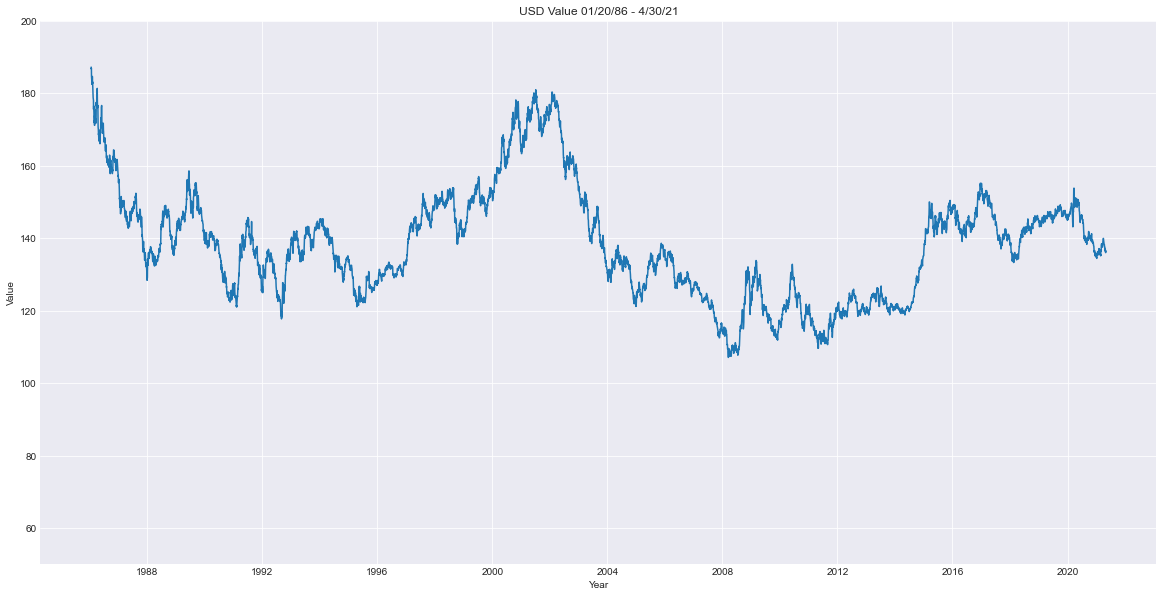

In [10]:
plt.figure(figsize=(20,10))

plt.plot(df['Date'], (df['High']+df['Low']/2))
plt.ylim((50,200))
#plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("USD Value 01/20/86 - 4/30/21")
plt.show()

In [11]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#using the same seed, so that results are somewhat the same.
tf.random.set_seed(1)
np.random.seed(1)

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


## model parameters

In [12]:
# Convert the data values to numpy for better and faster processing 
time_index = np.array(df['Date']) 
data = np.array(df['Close'])  

# Certain Hyper-parameters to tune 
SPLIT_RATIO = 0.9
WINDOW_SIZE = 2  
BATCH_SIZE = 5
SHUFFLE_BUFFER = 1000  
# Dividing into train-test split 
split_index = int(SPLIT_RATIO * data.shape[0])   
# Train-Test Split 
train_data = data[:split_index] 
train_time = time_index[:split_index]  
test_data = data[split_index:] 
test_time = time_index[split_index:]



train_data.shape, test_data.shape

((8105,), (901,))

## defining the model

In [13]:
def ts_data_generator(data, window_size, batch_size, shuffle_buffer):
  '''
  Utility function for time series data generation in batches
  '''
  ts_data = tf.data.Dataset.from_tensor_slices(data)
  ts_data = ts_data.window(window_size + 1, shift=1, drop_remainder=True)
  ts_data = ts_data.flat_map(lambda window: window.batch(window_size + 1))
  ts_data = ts_data.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  ts_data = ts_data.batch(batch_size).prefetch(1)
  return ts_data
# Expanding data into tensors
tensor_train_data = tf.expand_dims(train_data, axis=-1)
tensor_test_data = tf.expand_dims(test_data, axis=-1)

tensor_train_dataset = ts_data_generator(tensor_train_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)
tensor_test_dataset = ts_data_generator(tensor_test_data, WINDOW_SIZE, BATCH_SIZE, SHUFFLE_BUFFER)

tensor_train_dataset, tensor_test_dataset

(<PrefetchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>,
 <PrefetchDataset shapes: ((None, None, 1), (None, 1)), types: (tf.float64, tf.float64)>)

In [14]:
# Model Layers
# DHL Fusion model of 1D CNN and LSTM 

model = keras.models.Sequential([
    layers.Conv1D(filters=32, kernel_size=5,strides=1, padding="causal",activation="relu", input_shape=[None, 1]),
    layers.LSTM(64, return_sequences=True),   
    layers.LSTM(64, return_sequences=True),   
    layers.Dense(30, activation="relu"),   
    layers.Dense(10, activation="relu"),   
    layers.Dense(1)])

# optimizing model

In [15]:

optimizer = keras.optimizers.SGD(lr=1e-4, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(tensor_train_dataset, epochs=10, validation_data=tensor_test_dataset)

C:\Users\Cosby\AppData\Roaming\Python\Python39\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(
Epoch 1/10
1621/1621 [==============================] - 7s 2ms/step - loss: 82.2119 - mae: 82.7097 - val_loss: 11.3098 - val_mae: 11.8098
Epoch 2/10
1621/1621 [==============================] - 3s 2ms/step - loss: 4.6797 - mae: 5.1549 - val_loss: 5.8841 - val_mae: 6.3841
Epoch 3/10
1621/1621 [==============================] - 3s 2ms/step - loss: 3.8808 - mae: 4.3552 - val_loss: 0.6862 - val_mae: 1.0732
Epoch 4/10
1621/1621 [==============================] - 3s 2ms/step - loss: 2.7974 - mae: 3.2637 - val_loss: 2.9430 - val_mae: 3.4430
Epoch 5/10
1621/1621 [==============================] - 3s 2ms/step - loss: 2.6631 - mae: 3.1252 - val_loss: 0.8157 - val_mae: 1.2072
Epoch 6/10
1621/1621 [==============================] - 3s 2ms/step - loss: 2.5179 - mae: 2.9773 - val_loss: 1.3523

# Testing the model
Making predictions from the test set with our model

In [16]:
print(data[..., np.newaxis])
def model_forecast(model, data, window_size):
    ds = tf.data.Dataset.from_tensor_slices(data)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast
rnn_forecast = model_forecast(model, data[..., np.newaxis], WINDOW_SIZE) 
rnn_forecast = rnn_forecast[split_index - WINDOW_SIZE:-1, -1, 0]
# Overall Error
error = tf.keras.metrics.mean_absolute_error(test_data, rnn_forecast).numpy()
print(error)

[[124.59]
 [124.51]
 [124.75]
 ...
 [ 90.61]
 [ 90.61]
 [ 91.28]]
1.9089919


## plotting predictions

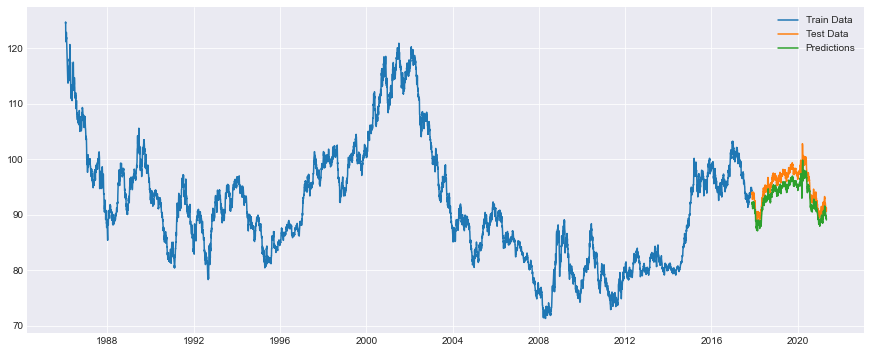

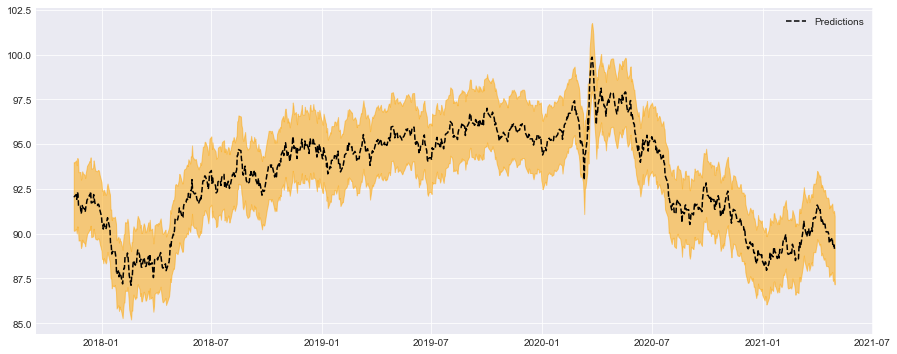

In [17]:
plt.figure(figsize=(15, 6)) 
plt.plot(df['Date'][0:len(train_data)], train_data, label = 'Train Data')
plt.plot(df['Date'][split_index:len(data)], test_data, label = 'Test Data') 
plt.plot(df['Date'][len(df['Date'])-len(test_data):], rnn_forecast, label = 'Predictions') 
plt.legend() 
plt.show()  
plt.figure(figsize=(15, 6)) 
# Plotting with Confidence Intervals 
plt.plot(df['Date'][len(df['Date'])-901:], rnn_forecast, label = 'Predictions', color = 'k', linestyle = '--')
plt.fill_between(df['Date'][len(df['Date'])-901:], rnn_forecast - error, rnn_forecast + error, alpha = 0.5, color = 'orange') 
plt.legend() 
plt.show()

# Feeding the model it's own results
The model will be fed it's own results, then those will be used to predict the next value. 
This will be done 365 times, to simulate a year of predictions.

In [18]:
# Now let's try without feeding it actual data to help the near predictions to simulate a long (independent) prediction
def independent_predict(model, init_data, window_size, days_in_future):

    data = init_data

    days = 0
    while days < days_in_future:
        #print("Data in: ", data)
        ds = tf.data.Dataset.from_tensor_slices(data)
        ds = ds.window(window_size, shift=1, drop_remainder=True)
        ds = ds.flat_map(lambda w: w.batch(window_size))
        ds = ds.batch(32).prefetch(1)
        forecast = model.predict(ds)

        data = np.append(data, forecast.flatten()[days])
        data = data.reshape(-1, 1)
        days += 1
        #print("Forecast: ", forecast)
    
    return data

rnn_forecast = independent_predict(model, test_data[0:2, np.newaxis], WINDOW_SIZE, 365) 


In [19]:
# Overall Error
error = tf.keras.metrics.mean_squared_error(test_data, rnn_forecast).numpy()
print(error.mean())

89.82071270018362


# Predictions plotted

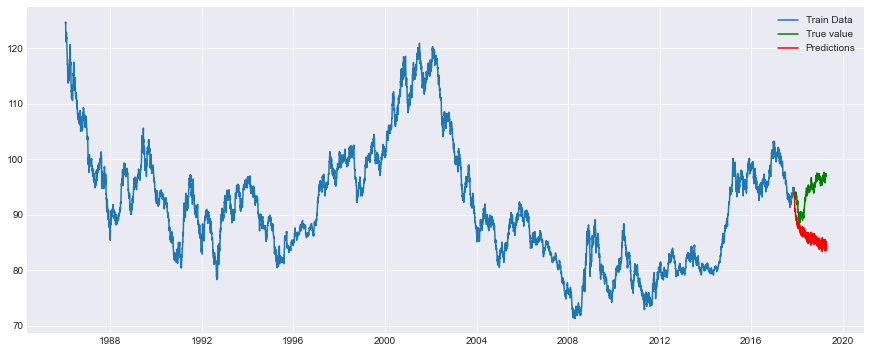

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [35]:
plt.figure(figsize=(15, 6)) 
plt.plot(df['Date'][:len(train_data)], train_data, label = 'Train Data')
plt.plot(df['Date'][len(train_data):len(train_data)+367], test_data[:367], label = 'True value', color='g') 
plt.plot(df['Date'][len(train_data):len(train_data)+367], rnn_forecast, label = 'Predictions', color='r') 
plt.legend() 
plt.show()  
plt.figure(figsize=(15, 6)) 
# # Plotting with Confidence Intervals 
# plt.plot(list(range(split_index,len(data))), rnn_forecast, label = 'Predictions', color = 'k', linestyle = '--')
# plt.fill_between(range(split_index,len(data)), rnn_forecast - error, rnn_forecast + error, alpha = 0.5, color = 'orange') 
# plt.legend() 
# plt.show()

The values predicted seem to rapidly form a pattern, that stabilizes in the end. It makes sence since all the uncertanties and noice is amplified with each new value

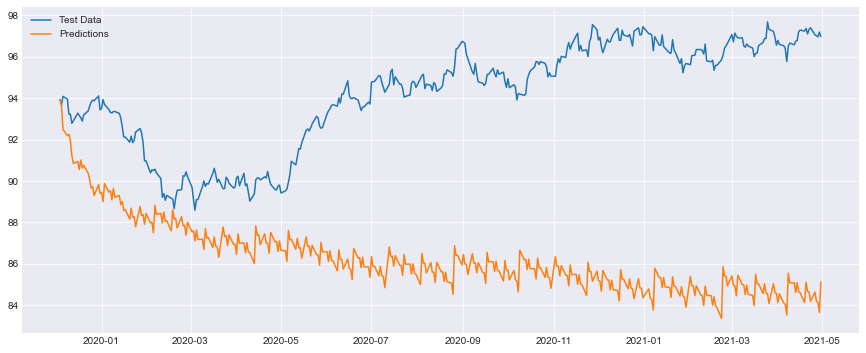

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [21]:
plt.figure(figsize=(15, 6)) 
# plt.plot(list(range(0,len(train_data))), train_data, label = 'Train Data')
# print(list(range(split_index,split_index + len(rnn_forecast[500:]))))
plt.plot(df['Date'][-367:], test_data[:365+2], label = 'Test Data') 
plt.plot(df['Date'][-367:], rnn_forecast, label = 'Predictions') 
plt.legend() 
plt.show()  
plt.figure(figsize=(15, 6)) 

# Save the model

In [22]:
# using tensorflow build in save method to store the model
model.save("./models/usd_rnn_model")


INFO:tensorflow:Assets written to: ./models/usd_rnn_model\assets
INFO:tensorflow:Assets written to: ./models/usd_rnn_model\assets


In [23]:
# Test that the file is there
loaded_model = tf.keras.models.load_model("./models/usd_rnn_model")

In [24]:
type(loaded_model)

tensorflow.python.keras.engine.sequential.Sequential